#Introduction

In this first notebook, I have downloaded the dataset from the [UK National Grid website](https://www.nationalgrideso.com/data-portal/historic-demand-data). I have perfomed data wrangling and EDA with Pandas, Seaborn and Matplotlib in order to better understand the trends in the time series. This helped during feature engineering and model selection perfomed in the next notebook.

In [ ]:
import datetime
import json
import os, pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [ ]:
current_directory = os.getcwd()

filename = 'historic_demand_2009_2024.csv'
file_path = os.path.join(current_directory, filename)

#Load data


In [ ]:
df = pd.read_csv(file_path, index_col=0)

#EDA

The goals are:
- data cleaning and preprocessing (null values, outliers, unneeded information)
- grasp seasonal trends and understand the data

In [ ]:
df.tail()

,settlement_date,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,...,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,scottish_transfer,viking_flow,is_holiday
264811,2024-02-08,44,30670,32324,28979,3855,6562,0,15905,0,...,-4,439,-452,-531,999,-55.0,997.0,5754.0,0.0,0
264812,2024-02-08,45,28684,30714,27230,3873,6562,0,15905,0,...,-4,141,-451,-531,897,-432.0,997.0,5764.0,0.0,0
264813,2024-02-08,46,27147,29324,25762,3890,6562,0,15905,0,...,-4,139,-452,-531,893,-465.0,997.0,5695.0,-13.0,0
264814,2024-02-08,47,25356,28595,24042,3872,6562,0,15905,0,...,-4,-102,-406,-490,996,-284.0,996.0,5745.0,-561.0,0
264815,2024-02-08,48,24286,27944,23034,3853,6562,0,15905,0,...,-4,-110,-351,-385,999,-284.0,996.0,5491.0,-594.0,0


This dataset is from the Great Britain National Grid Electricity System Operator (ESO). It contains information about the electricity demand from 2009 to 2024, updated haf-hourly. We then have enough data per day for time series forecasting.

The columns represent:

- SETTLEMENT_DATE: date in format dd/mm/yyyy
- SETTLEMENT_PERIOD: half hourly period for the historic outturn occurred
- ND (National Demand). National Demand is the sum of metered generation, but excludes generation required to meet station load, pump storage pumping and interconnector exports. National Demand is calculated as a sum of generation based on National Grid ESO operational generation metering. Measured in MW.
- TSD (Transmission System Demand). Transmission System Demand is equal to the ND plus the additional generation required to meet station load, pump storage pumping and interconnector exports. Measured in MW.
- ENGLAND_WALES_DEMAND. England and Wales Demand, as ND above but on an England and Wales basis. Measured in MW.
- EMBEDDED_WIND_GENERATION. This is an estimate of the GB wind generation from wind farms which do not have Transmission System metering installed. These wind farms are embedded in the distribution network and invisible to National Grid ESO. Their effect is to suppress the electricity demand during periods of high wind. The true output of these generators is not known so an estimate is provided based on National Grid ESO’s best model. Measured in MW.
- EMBEDDED_WIND_CAPACITY. This is National Grid ESO’s best view of the installed embedded wind capacity in GB. This is based on publicly available information compiled from a variety of sources and is not the definitive view. It is consistent with the generation estimate provided above. Measured in MW
- EMBEDDED_SOLAR_GENERATION. This is an estimate of the GB solar generation from PV panels. These are embedded in the distribution network and invisible to National Grid ESO. Their effect is to suppress the electricity demand during periods of high radiation. The true output of these generators is not known so an estimate is provided based on National Grid ESO’s best model. Measured in MW.
- EMBEDDED_SOLAR_CAPACITY. As embedded wind capacity above, but for solar generation. Measured in MW.
- NON_BM_STOR (Non-Balancing Mechanism Short-Term Operating Reserve). For units that are not included in the ND generator definition. This can be in the form of generation or demand reduction. Measured in MW.
- PUMP_STORAGE_PUMPING. The demand due to pumping at hydro pump storage units; the -ve signifies pumping load.
- IFA_FLOW (IFA Interconnector Flow). The flow on on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- IFA2_FLOW (IFA Interconnector Flow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- BRITNEY_FLOW = The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- MOYLE_FLOW (Moyle Interconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- EAST_WEST_FLOW (East West Innterconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- NEMO_FLOW (Nemo Interconnector FLow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- NSL_FLOW (North Sea Link Interconnector Flow). The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- ELCLINK_FLOW: The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.
- SCOTTISH_TRANSFER = The volume of power flowing from Scotland to England and Wales. Negative values denote a flow from England and Wales to Scotland. Measured in MW.
- VIKING_FLOW = The flow on the respective interconnector. -ve signifies export power out from GB; +ve signifies import power into GB. Measured in MW.

All flows are from the submarine cables linking the electrity grids of multiple regions of the UK nationally and internationally.

In [ ]:
df.sort_values(
    by=['settlement_date', 'settlement_period'], inplace = True, ignore_index = True
)

In [ ]:
df.shape

(264816, 22)

In [ ]:
df.describe()

,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,...,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,nsl_flow,eleclink_flow,scottish_transfer,viking_flow,is_holiday
count,264816.000000,264816.000000,264816.000000,264816.000000,264816.000000,264816.000000,264816.000000,264816.000000,264816.000000,264816.000000,...,264816.000000,264816.000000,264816.00000,264816.000000,264816.000000,89520.000000,89520.000000,19392.000000,19392.000000,264816.000000
mean,24.500227,31504.537358,32921.045749,28667.755774,1242.966573,4331.097245,829.066148,8219.825075,7.017265,311.785629,...,27.051949,522.169559,-116.40814,-36.193897,158.027751,299.353318,26.886092,1715.635262,48.664501,0.022838
std,13.853818,7814.098007,7718.003064,7081.245993,949.364302,1943.416081,1637.697117,5676.571492,40.172911,536.573773,...,325.820897,526.095096,227.41281,255.713040,403.361103,589.323838,438.183194,1882.476750,247.753671,0.149389
min,1.000000,13367.000000,0.000000,0.000000,0.000000,1403.000000,0.000000,0.000000,-24.000000,0.000000,...,-1030.000000,-1215.000000,-505.00000,-585.000000,-1022.000000,-1455.000000,-1028.000000,-2851.000000,-1465.000000,0.000000
25%,12.750000,25248.000000,26897.000000,22976.000000,538.000000,2087.000000,0.000000,1930.000000,0.000000,8.000000,...,0.000000,0.000000,-271.00000,-164.000000,0.000000,0.000000,0.000000,232.000000,0.000000,0.000000
50%,24.500000,30890.000000,32124.000000,28103.000000,994.000000,4260.000000,0.000000,10500.000000,0.000000,11.000000,...,0.000000,748.000000,-134.00000,0.000000,0.000000,0.000000,0.000000,1540.000000,0.000000,0.000000
75%,36.250000,37250.000000,38415.250000,33916.000000,1687.000000,6488.000000,792.000000,13080.000000,0.000000,400.000000,...,0.000000,994.000000,37.00000,0.000000,61.000000,693.000000,0.000000,3071.000000,0.000000,0.000000
max,50.000000,59095.000000,60147.000000,53325.000000,5587.000000,6574.000000,9830.000000,15954.000000,893.000000,2019.000000,...,1016.000000,1143.000000,499.00000,504.000000,1033.000000,1401.000000,1002.000000,6238.000000,1412.000000,1.000000


In [ ]:
df.isnull().sum()

,0
settlement_date,0
settlement_period,0
nd,0
tsd,0
england_wales_demand,0
embedded_wind_generation,0
embedded_wind_capacity,0
embedded_solar_generation,0
embedded_solar_capacity,0
non_bm_stor,0


In [ ]:
def existing_years(column):
  not_null_mask = df[column].notna()
  years = df.loc[not_null_mask, 'settlement_date'].str[:4].unique()
  return years

In [ ]:
existing_years("eleclink_flow"), existing_years("nsl_flow"), existing_years("scottish_transfer"), existing_years("viking_flow")

(array(['2019', '2020', '2021', '2022', '2023', '2024'], dtype=object),
 array(['2019', '2020', '2021', '2022', '2023', '2024'], dtype=object),
 array(['2023', '2024'], dtype=object),
 array(['2023', '2024'], dtype=object))

The four features contain null values on about 70% to 90% of the dataset and only have values from recent years (2019 and 2023). It appears reasonable to drop them.

Rows where the settlement_period is greater than 48 will also be removed as they are likely to errors during data logging.

In [ ]:
df.drop(columns=["eleclink_flow","nsl_flow","scottish_transfer","viking_flow"], axis=1, inplace = True)

df.drop(index=df[df["settlement_period"]> 48].index, inplace = True)
df.reset_index(drop=True, inplace = True)

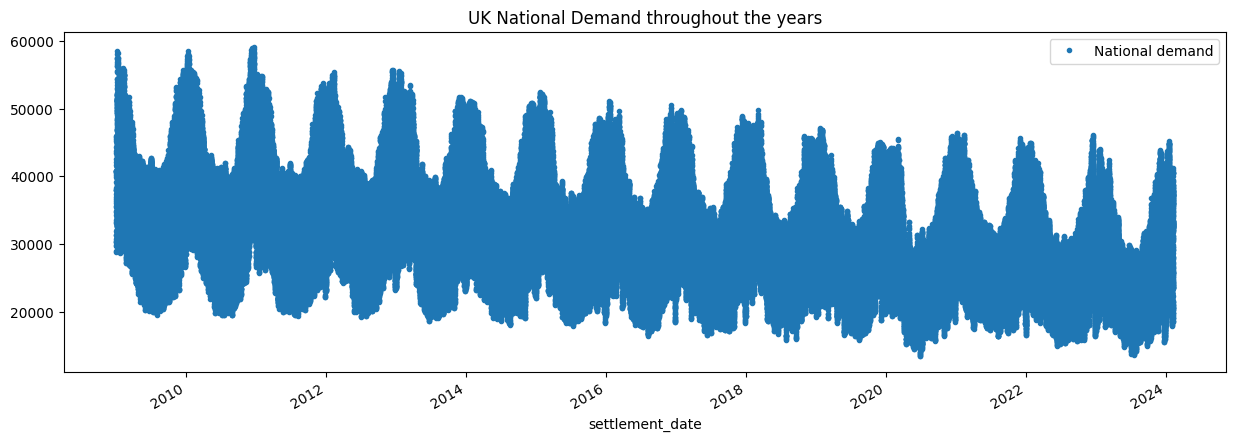

In [ ]:
df_plot = df.copy()
df_plot = df_plot.set_index('settlement_date')
df_plot.index = pd.to_datetime(df_plot.index)

fix, ax = plt.subplots(figsize = (15, 5))
df_plot['nd'].plot(
    style = '.', ax=ax, title= 'UK National Demand throughout the years', label = 'National demand'
)

ax.legend();

This plot shows decreasing and yearly seasonal trends.

# Outlier analysis

<Axes: xlabel='nd', ylabel='Count'>

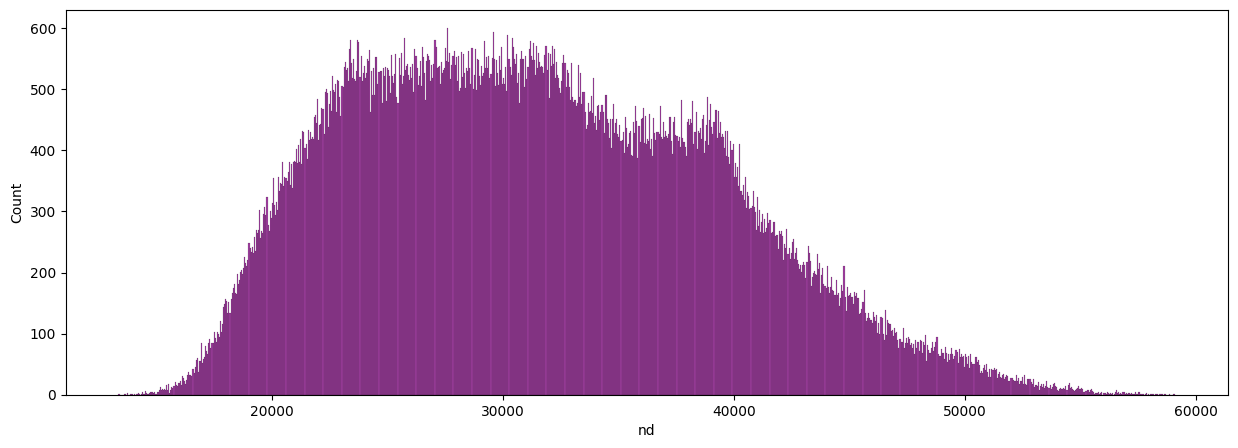

In [ ]:
fix, ax = plt.subplots(figsize =(15,5))
sns.histplot(data=df, x='nd', bins =1000, ax=ax, color ='purple')

In [ ]:
df['nd'].isnull().sum()

0

#Data preparation

First, we need to change the date format to include the hourly values by leveraging the settlement_period column. There are 48 samples a day, therefore a sample is taken every 30 minutes.

In [ ]:
df['period_hour'] = df['settlement_period'].apply(
    lambda x: str(datetime.timedelta(hours=(x - 1) * 0.5))
)

df.loc[df['period_hour'] == "1 day, 0:00:00", "period_hour"] = "0:00:00"

column_to_move = df.pop('period_hour')
df.insert(2, "period_hour", column_to_move)

df[45:50]

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
45,2009-01-01,46,22:30:00,35987,36781,32163,82,1403,0,0,0,13,1345,0,0,-181,0,0,1
46,2009-01-01,47,23:00:00,34769,36116,31016,82,1403,0,0,0,693,806,0,0,-54,0,0,1
47,2009-01-01,48,23:30:00,33504,35379,29927,62,1403,0,0,0,1235,916,0,0,-40,0,0,1
48,2009-01-02,1,0:00:00,34221,35837,30659,62,1403,0,0,0,976,916,0,0,-40,0,0,0
49,2009-01-02,2,0:30:00,34029,36024,30506,82,1403,0,0,0,1226,904,0,0,-169,0,0,0


In [ ]:
df['settlement_date'] = pd.to_datetime(
    (df['settlement_date'] + ' ' + df['period_hour'])
)
df[45:50]

,settlement_date,settlement_period,period_hour,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,ifa_flow,ifa2_flow,britned_flow,moyle_flow,east_west_flow,nemo_flow,is_holiday
45,2009-01-01 22:30:00,46,22:30:00,35987,36781,32163,82,1403,0,0,0,13,1345,0,0,-181,0,0,1
46,2009-01-01 23:00:00,47,23:00:00,34769,36116,31016,82,1403,0,0,0,693,806,0,0,-54,0,0,1
47,2009-01-01 23:30:00,48,23:30:00,33504,35379,29927,62,1403,0,0,0,1235,916,0,0,-40,0,0,1
48,2009-01-02 00:00:00,1,0:00:00,34221,35837,30659,62,1403,0,0,0,976,916,0,0,-40,0,0,0
49,2009-01-02 00:30:00,2,0:30:00,34029,36024,30506,82,1403,0,0,0,1226,904,0,0,-169,0,0,0


In [ ]:
df.set_index('settlement_date', inplace = True)
df.sort_index (inplace = True)

In [ ]:
df.drop(columns=["period_hour"], axis=1, inplace = True)

Now that the datetime index has been set, we can have a better look at the overall time series patterns, as well as yearly, monthly and daily trends.

In [ ]:
df_all = df.resample('Y').mean()

In [ ]:
df_yearly = df.resample('3W').mean()

<Axes: title={'center': 'National Demand from 2009 to 2024'}, xlabel='settlement_date'>

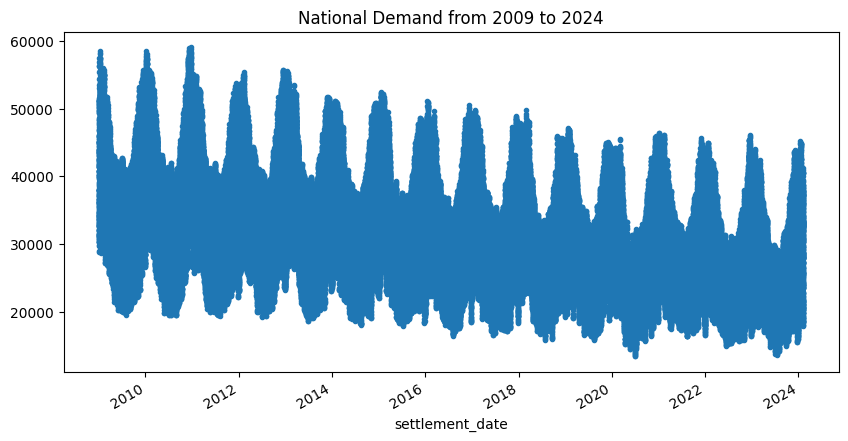

In [ ]:
df['nd'].plot(style = '.', title= 'National Demand from 2009 to 2024', figsize = (10, 5))

###Overall time series trends

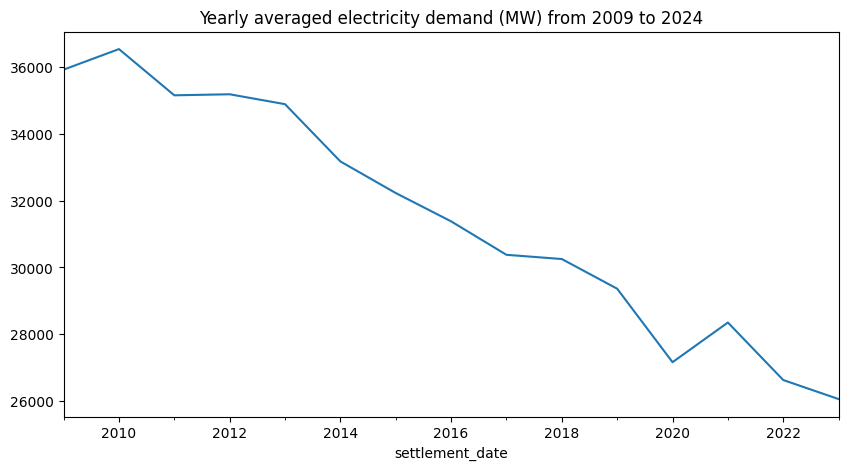

In [ ]:
df_all.loc[(df_all.index > '01-01-2009 00:00:00') & (df_all.index < '01-01-2024 00:00:00')]['nd'].plot(
    figsize = (10, 5), title="Yearly averaged electricity demand (MW) from 2009 to 2024"
);

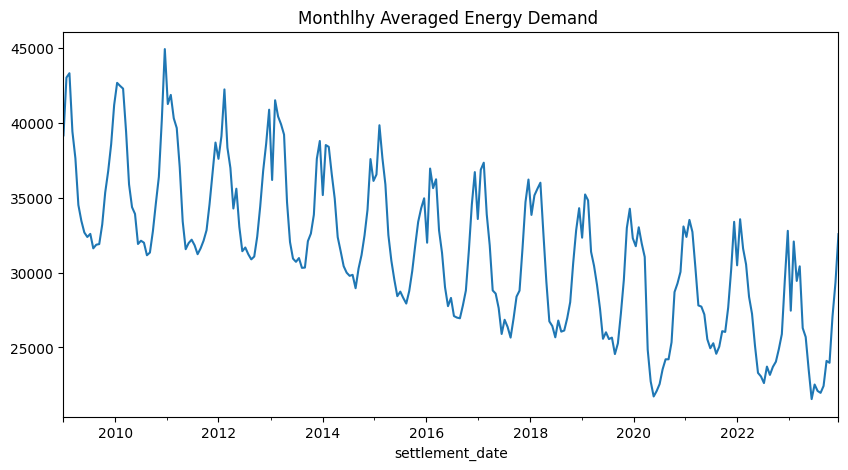

In [ ]:
df_yearly.loc[(df_yearly.index > '01-01-2009 00:00:00') & (df_yearly.index < '01-01-2024 00:00:00')]['nd'].plot(
    figsize = (10, 5), title="Monthlhy Averaged Energy Demand "
);

Overall decrease from 2009 to 2024, with about the same yearly trends, except for the abrupt decrease in the first quarter of 2020 due to the first COVID-19 lockdown.

###Yearly patterns

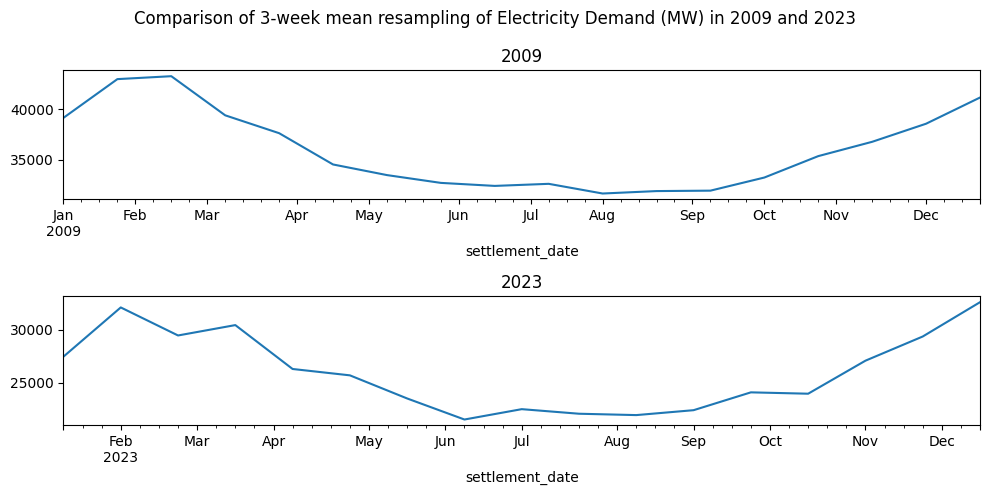

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharey=False, figsize=(10, 5))

df_yearly.loc[(df_yearly.index > '01-01-2009') & (df_yearly.index < '01-01-2010')]['nd'].plot(ax=ax[0])
ax[0].set_title("2009")

df_yearly.loc[(df_yearly.index > '01-01-2023') & (df_yearly.index < '01-01-2024')]['nd'].plot(ax=ax[1])
ax[1].set_title("2023")

fig.suptitle("Comparison of 3-week mean resampling of Electricity Demand (MW) in 2009 and 2023")
plt.tight_layout()
plt.show()

Same seasonal trends over the years, with a peak in energy during winter and a steep decrease in summer. in 2023, The small different fluctuations may be due to the disrupted and unpredictable weather due to climatic change , if we assume that temperature is the main contributer to energy consumption (look at uk main contributor to energy).

###Weekly and daily trends

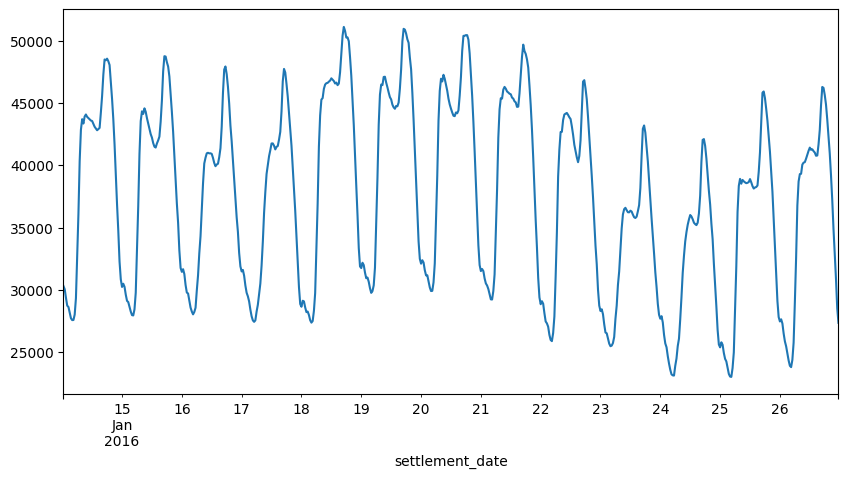

In [ ]:
df.loc[(df.index > '01-14-2016') & (df.index < '01-27-2016')]['nd'].plot(
    figsize = (10, 5)
);

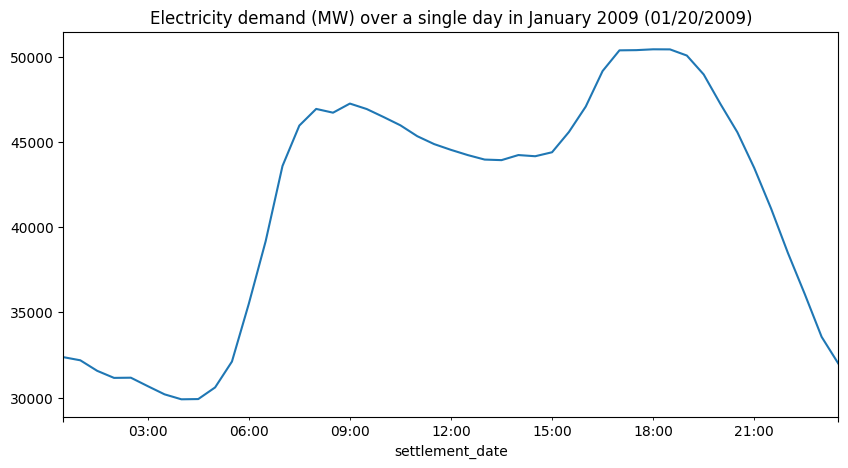

In [ ]:
df.loc[(df.index > '01-20-2016 00:00:00') & (df.index < '01-21-2016 00:00:00')]['nd'].plot(
    figsize = (10, 5), title="Electricity demand (MW) over a single day in January 2009 (01/20/2009)"
);

In [ ]:
def create_features(df):
    """
    Create time series features based on ticme series index

    Args:
        - df: time series dataframe

    Returns:
        - df: time series dataframe with new features
    """
    df= df.copy()
    df["day_of_month"] = df.index.day
    df["day_of_week"] = df.index.day_of_week
    df["day_of_year"] = df.index.day_of_year
    df["quarter"] = df.index.quarter
    df["month"] = df.index.month
    df["year"] = df.index.year
    df["week_of_year"] = df.index.isocalendar().week.astype("int64")
    return df

In [ ]:
df_ext = create_features(df)

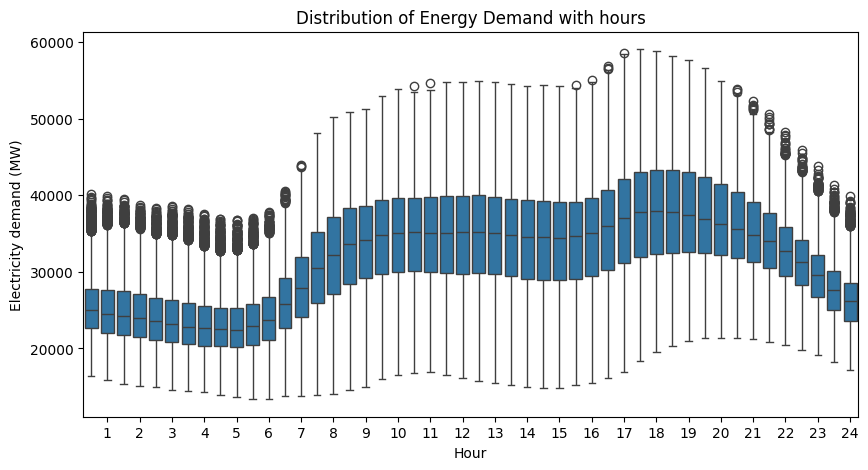

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="settlement_period", y="nd", data=df_ext)
# Reduce the frequency of the xticks and change the labels to be in
# the range [0,24] hours
ax.set_xticks(range(1, 49, 2))
ax.set_xticklabels(range(1, 25))
ax.set_xlabel("Hour")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of Energy Demand with hours");

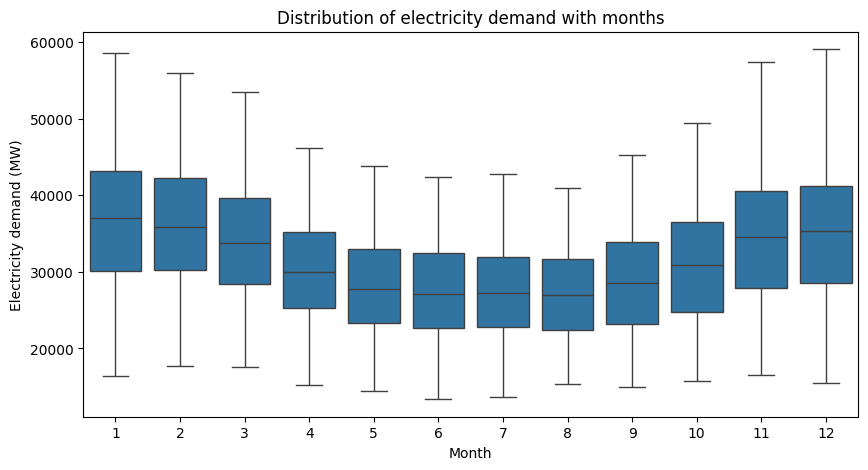

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x="month", y="nd", data=df_ext)

ax.set_xlabel("Month")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity demand with months");

<ipython-input-31-0847ef47ab49>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


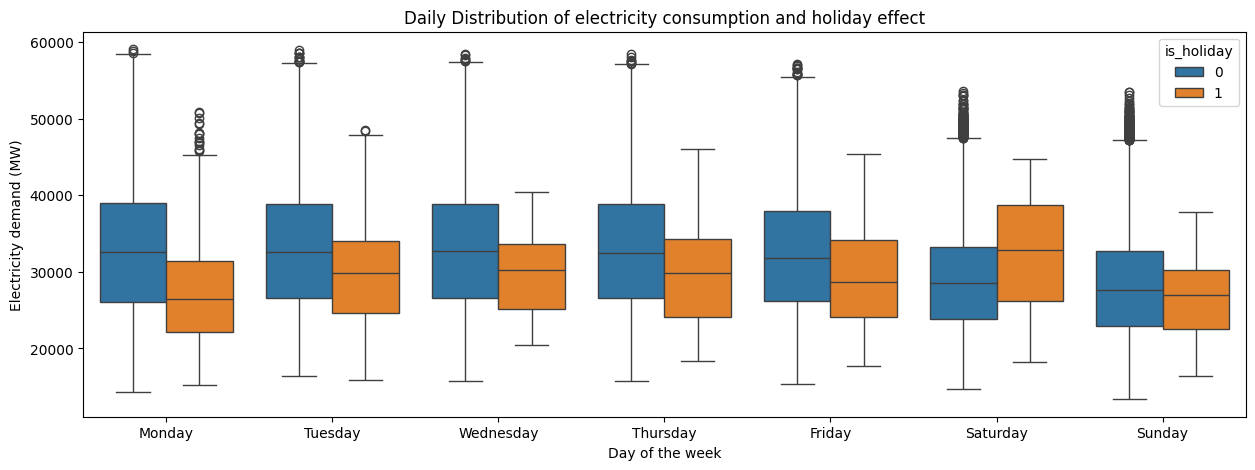

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="day_of_week", y="nd", data=df_ext, hue="is_holiday", ax=ax)

ax.set_xticklabels(
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)
ax.set_xlabel("Day of the week")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Daily Distribution of electricity consumption and holiday effect");

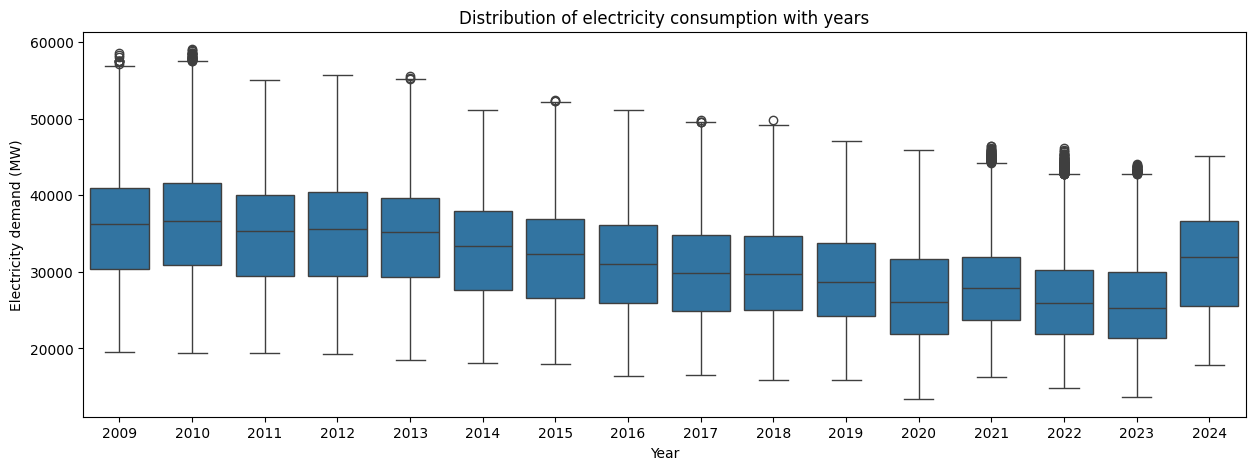

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(x="year", y="nd", data=df_ext)

ax.set_xlabel("Year")
ax.set_ylabel("Electricity demand (MW)")
ax.set_title("Distribution of electricity consumption with years");

From these charts, we can see that energy usage ramps up from 6 am to 9 am and again from 3 pm to 6 pm.
At 12 am to 3 pm our energy usage remains stable.
It typically drops after the start and end of the day (likely when most people are asleep).
The demand for winter is about twice as low as the demand for summer.

# Correlation

We used Kendall correlation coefficient as our time series data is non-linear.

In [ ]:
diff_df = df_ext.diff().dropna()

In [ ]:
corr_matrix_kendall = diff_df.corr(method='kendall', numeric_only = True)
corr_matrix_kendall

,settlement_period,nd,tsd,england_wales_demand,embedded_wind_generation,embedded_wind_capacity,embedded_solar_generation,embedded_solar_capacity,non_bm_stor,pump_storage_pumping,...,east_west_flow,nemo_flow,is_holiday,day_of_month,day_of_week,day_of_year,quarter,month,year,week_of_year
settlement_period,1.000000,0.104297,0.081455,0.097501,0.015245,-5.450493e-02,-0.002629,-0.361000,-0.000229,-0.114726,...,-0.033311,0.016954,9.095245e-04,-0.934034,-0.713386,-0.994504,-0.051535,-0.149548,-0.051604,-0.360154
nd,0.104297,1.000000,0.877920,0.953884,-0.006154,-8.595741e-03,0.002401,-0.044223,0.107973,-0.236041,...,-0.082130,0.102321,-2.343970e-04,-0.097515,-0.077411,-0.104552,-0.013706,-0.019890,0.002475,-0.034955
tsd,0.081455,0.877920,1.000000,0.863578,-0.000977,-6.288414e-03,0.005075,-0.029242,0.096895,-0.177892,...,-0.097529,0.086862,-1.374877e-03,-0.075815,-0.060609,-0.081574,-0.011256,-0.016041,0.001165,-0.026856
england_wales_demand,0.097501,0.953884,0.863578,1.000000,-0.003957,-7.853686e-03,-0.005304,-0.037274,0.092321,-0.234696,...,-0.078167,0.100510,-3.059334e-04,-0.091137,-0.072578,-0.097851,-0.014139,-0.019263,0.003363,-0.032673
embedded_wind_generation,0.015245,-0.006154,-0.000977,-0.003957,1.000000,-2.995013e-03,0.219754,-0.007512,-0.012078,-0.015851,...,-0.045677,0.007715,-1.992272e-03,-0.014165,-0.009907,-0.015023,-0.001015,-0.001712,-0.002149,-0.007044
embedded_wind_capacity,-0.054505,-0.008596,-0.006288,-0.007854,-0.002995,1.000000e+00,0.000264,0.037590,0.000142,0.010115,...,0.002430,0.000441,-3.742448e-08,0.026094,0.032491,0.052474,-0.019617,0.067126,0.019410,0.028918
embedded_solar_generation,-0.002629,0.002401,0.005075,-0.005304,0.219754,2.637418e-04,1.000000,0.001662,-0.023557,-0.060459,...,-0.125446,0.064670,-2.356779e-06,0.002451,0.001856,0.002615,0.000139,0.000404,0.000139,0.000973
embedded_solar_capacity,-0.361000,-0.044223,-0.029242,-0.037274,-0.007512,3.758972e-02,0.001662,1.000000,-0.000306,0.069033,...,0.019951,-0.001254,1.350500e-03,0.337895,0.256940,0.357581,-0.000660,0.044112,0.032447,0.127027
non_bm_stor,-0.000229,0.107973,0.096895,0.092321,-0.012078,1.418346e-04,-0.023557,-0.000306,1.000000,0.002865,...,-0.010610,0.001426,-5.456094e-04,0.000352,0.000041,0.000221,-0.000967,-0.000383,0.000075,0.000820
pump_storage_pumping,-0.114726,-0.236041,-0.177892,-0.234696,-0.015851,1.011459e-02,-0.060459,0.069033,0.002865,1.000000,...,0.022925,-0.006999,-3.131607e-03,0.107900,0.080454,0.114926,0.012365,0.019663,-0.001942,0.044941


# More testing with OLS Regression

In [ ]:
import statsmodels.api as sm

X = df_ext[['embedded_wind_capacity', 'day_of_week', 'year', 'moyle_flow', 'day_of_month']]
y = df_ext['nd']

# Add a constant term to the input features matrix (required for statsmodels)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Get the summary statistics, which includes p-values
summary = model.summary()

# Print the summary
print(summary)


                            OLS Regression Results                            
Dep. Variable:                     nd   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                 1.950e+04
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        23:45:22   Log-Likelihood:            -2.7077e+06
No. Observations:              264786   AIC:                         5.415e+06
Df Residuals:                  264780   BIC:                         5.415e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.14

# Conclusions and next steps

It has been seen that our data has a daily and yearly seasonality with a decreasing trend.

The target used will be National Demand (in MW). Other types of demand (Transmission System Demand, England and Wales demand...) and flow (Nemo flow, Moyle flow...) features will not be considered as they are highly multicollinear with the National Demand.

As the correlation and OLS Regression tests did not give conclusive results as to the explainability of the target variable ('nd') by the other features, only the National Demand will be kept and other features will be derived from it in the next notebook.

Then, the importance of these features in the computation of the predictions will be evaluated and and our model will be fine-tuned accordingly.

In [ ]:
# import pickle

# with open('/content/drive/MyDrive/Data/energy_demand_project/energy_dataset.pkl', 'wb') as i:
#     pickle.dump(df_ext,i)